# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv("assignment3_creditcard.csv")

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [5]:
data2=data.drop(["Class"],axis=1)
data2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,0.137028,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,0.643614,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,0.104002,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.057182,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999


In [6]:
#  scaling 진행합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Scaling
scaler.fit_transform(data2)

array([[-0.90218019,  1.44246214,  0.24207645, ..., -1.29584288,
        -0.04709654,  0.9417547 ],
       [ 1.02744235, -0.32892601, -0.7953942 , ...,  2.02637926,
        -0.23721911, -0.22629752],
       [-1.46190736, -1.73320058,  0.7053479 , ...,  1.57721728,
        -0.7554671 , -1.02943014],
       ...,
       [ 1.02786291,  0.0843943 , -0.9747001 , ...,  0.36917223,
        -0.15087861, -0.1030219 ],
       [-0.33236542,  0.79733419,  0.8782926 , ...,  0.21096583,
        -2.140772  , -1.05999649],
       [ 1.09831537, -0.52987507, -0.90637085, ..., -0.61547609,
        -0.13776702, -0.2565925 ]])

In [7]:
data1 = pd.DataFrame(scaler.fit_transform(data2), columns = data2.columns.tolist())

In [8]:
data1["Class"]=data.Class

In [9]:
data1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.902180,1.442462,0.242076,0.682170,-0.545636,1.897453,-3.087657,-7.481774,-1.310739,-1.750813,...,3.586292,-6.258702,1.163043,0.721013,-0.838813,1.973207,-1.295843,-0.047097,0.941755,0
1,1.027442,-0.328926,-0.795394,-0.395393,0.029429,-0.432294,0.005620,-0.185605,1.049741,-0.240491,...,-0.110982,0.038445,0.528470,0.078108,0.993348,0.194594,2.026379,-0.237219,-0.226298,0
2,-1.461907,-1.733201,0.705348,-0.027248,-0.751404,-0.194335,0.415558,0.461429,0.403048,-1.409372,...,1.864714,0.429058,-0.520817,2.025422,0.676446,0.019311,1.577217,-0.755467,-1.029430,0
3,-0.720659,0.921458,0.191638,0.540317,-0.333272,-0.533410,0.368140,0.395090,-0.672139,0.292162,...,0.049651,0.125696,0.549344,-0.188079,0.898622,-0.414465,-0.857327,0.065929,-0.511850,0
4,-0.131203,-0.224824,-1.203698,-0.599739,0.094078,-1.105548,1.362418,-0.622372,-1.085267,0.894765,...,-1.219154,-0.017103,1.373663,-0.036971,0.129301,-2.831946,1.555181,1.248615,1.110322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,1.023255,-0.023908,-0.566583,0.251205,-0.024285,-0.892442,0.202475,-0.286709,0.376723,0.071062,...,-0.239323,-0.341422,-0.845179,0.566116,0.117848,-0.517101,0.399455,-0.165871,-0.200830,0
28674,0.630217,-0.793406,0.924346,-0.163191,-1.294682,0.410528,-1.177492,0.340326,0.900087,0.251606,...,-0.177753,0.158912,0.972702,-0.056755,0.173374,0.662386,-0.018687,0.223756,0.061716,0
28675,1.027863,0.084394,-0.974700,0.230460,0.397149,-0.572397,0.204807,-0.205689,0.352270,-0.290601,...,-0.120511,-0.438509,-1.230805,0.520796,0.666969,-0.406308,0.369172,-0.150879,-0.103022,0
28676,-0.332365,0.797334,0.878293,1.357837,0.732640,0.508122,0.623108,-0.346918,-0.584673,1.218846,...,0.039199,0.118811,0.613586,-0.590491,-1.276522,-0.688309,0.210966,-2.140772,-1.059996,0


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [11]:
# modeling 진행합니다.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = data1.drop(["Class"], axis=1)
y = data1["Class"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


In [14]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [15]:
# class 예측
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.99162657e-01, 8.37342733e-04],
       [9.99687212e-01, 3.12787618e-04],
       [9.79470309e-01, 2.05296911e-02],
       ...,
       [9.99915594e-01, 8.44058313e-05],
       [9.96014554e-01, 3.98544568e-03],
       [9.99193219e-01, 8.06781183e-04]])

In [17]:
from sklearn.metrics import *

In [18]:
confusion_matrix(y_test, y_pred)

array([[7114,    4],
       [  11,   41]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)
# 정확도는 0.9979로 전체 결과 중 99.79%를 정확하게 분류했습니다.(사기를 사기라고 분류하고, 사기x를 사기x라 분류하는 지표)

0.997907949790795

In [20]:
precision_score(y_test, y_pred)
# 정밀도는 91.11%로 모델이 사기라고 분류한 것 중 실제 사기였던 것의 비율은 99.15%입니다.

0.9111111111111111

In [21]:
recall_score(y_test, y_pred)
# 재현율은 78.84%로, 실제 사기인 것 중 모델이 사기라고 분류한 것의 비율은 78.84% 였습니다.

0.7884615384615384

In [22]:
f1_score(y_test, y_pred)
# 정밀도와 재현율을 섞어서 만든 f1스코어는 0.8453이었습니다. 저는 f1스코어를 가장 중요한 평가지표로 판단할 것입니다.
#F1 score는 지금 우리 데이터처럼 label이 불균형 구조일 때, 모형의 성능 평가가 비교적 정확하기 때문에 f1스코어가 가장 중요합니다.
#(현재 우리 데이터에는 사기가 아닌 0의 데이터가 사기인 데이터 1보다 100배정도 많은 매우 불균형한 상태입니다.)

0.845360824742268

AUC: 0.8939497914280155


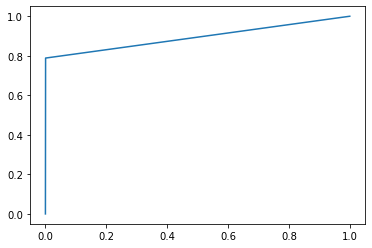

In [23]:
# sklearn에서 ROC 패키지 활용

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

# 사기가 아닌데 사기라고 잘못 판단한 FPR과 sensitivity를 고려한 그래프에서 AUC는 0.89가 나왔습니다. 

# 성능개선- 경사하강법 사용하기

In [24]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+np.exp(-z))   
    return p

def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = 0.5*((y-y_hat)**2)
    return loss

def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y-p)*X[j]
    return gradient

def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (learning_rate/n)
    
    parameters -= gradients
    return parameters

def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

In [25]:
# 최적화 과제를 통해 경사하강법을 배웠으니, 최적의 모수를 찾아주기 위해 경사하강법을 진행하여, 새로운 parameter들을 얻습니다.
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 10)
new_param_bgd

epoch: 0  loss: 0.27628720251613836  params: [-1.12384614e+00  9.18383514e-01 -2.27400178e+00  1.11371685e+00
 -1.27637130e+00 -3.43542826e-01 -2.38926138e+00  5.88560151e-01
 -8.12577409e-01 -2.40917927e+00  1.45361469e+00 -2.82715954e+00
  1.18249461e-02 -2.99995280e+00 -8.06222945e-02 -2.28776829e+00
 -4.72946913e+00 -1.28774604e+00  4.33979723e-01  2.12408460e-01
  2.60186304e-01  7.80761183e-02  1.36240228e-02 -2.13338224e-02
 -1.99114949e-03  3.90943113e-02  1.13968142e-01  4.84974955e-02]  gradients: [0.010038540977724303, -0.009736729491332587, -0.0064750785836211276, 0.000935699957362486, 0.01033433962575463, 0.012163026420000743, -0.0050044882812180095, 0.004289712872220973, -0.00889197682634615, 0.013759688781228073, -0.01107366327738835, -0.0025513004377216426, -0.011727488435409337, 0.0032361328605812895, -0.013838363203430681, -0.007281318540256558, -0.003234646696507862, 0.004372482321578326, -0.006885021301309882, -0.0018008639202644547, -0.0012250138838183725, -0.00051

array([-1.74289835,  1.39950346, -3.36032579,  1.66598479, -1.94176151,
       -0.58220466, -3.57260806,  0.77910385, -1.36616058, -3.57616786,
        2.15585   , -4.29379121,  0.08913455, -4.44404488, -0.04630526,
       -3.30449504, -7.1262059 , -1.97899309,  0.6419144 ,  0.31658215,
        0.41530857,  0.03017929, -0.04187527, -0.01189784,  0.11043605,
       -0.00902781,  0.24032032,  0.10980443])

In [26]:
# 새로운 예측값을 얻어 성능평가 지표들을 확인해봅니다.
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

In [28]:
from sklearn.metrics import *

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[7118,    0],
       [   5,   47]], dtype=int64)

In [30]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)
# 정확도는 기존 0.9979에서 0.9993으로 미세하게 증가했습니다.

accuracy: 0.999302649930265


In [31]:
precision_score(y_test, y_predict)
# 정밀도는 기존 0.9111에서 1로, 최고점에 도달했습니다.

1.0

In [32]:
recall_score(y_test, y_predict)
# 재현율은 기존 0.7884에서 0.9로 개선되었습니다.

0.9038461538461539

In [33]:
f1_score(y_test, y_predict)
# 가장 중요하게 생각하는 f1 스코어는 기존 0.8453에서 0.9494로 개선되었습니다.

0.9494949494949495

AUC: 0.9519230769230769


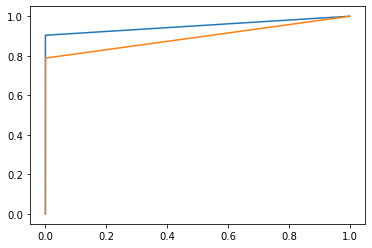

In [41]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_predict,pos_label = 1)

# ROC curve
plt.plot(fpr2,tpr2)
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr2,fpr2)
print("AUC:",auc)
# AUC는 기존0.8939에서 0.95로 개선되었습니다. (기존 주황색에서 파란색으로 개선)

In [35]:
# cutoff 포인트를 변화를 주면서 구체적으로 어떤 수치에서 cutoff를 정해야 f1스코어가 가장 높아지는지 보겠습니다.
P_1 = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    P_1.append(p)

In [36]:
P_2=np.array(P_1)

In [37]:
P_2.shape

(7170,)

In [40]:
Cut_off=np.linspace(0.01,0.99,10) #cut off 값 만들기
for cutoff in Cut_off:
    y_pred2=np.where(P_2.reshape(-1)>=cutoff,1,0)
    acc=accuracy_score(y_true=y_test,y_pred=y_pred2) #정확도
    recall=recall_score(y_true=y_test,y_pred=y_pred2) #민감도
    precision=precision_score(y_true=y_test,y_pred=y_pred2) #정밀도
    f1=f1_score(y_test,y_pred2) # f1 score

    print(f"정확도 : {acc : 0.2f}",f"민감도 : {recall : 0.2f}",f"정밀도 : {precision : 0.2f}",f"cut off : {cutoff : 0.2f}",f"f1 : {f1 : 0.2f}")

정확도 :  0.01 민감도 :  1.00 정밀도 :  0.01 cut off :  0.01 f1 :  0.01
정확도 :  0.02 민감도 :  1.00 정밀도 :  0.01 cut off :  0.12 f1 :  0.01
정확도 :  0.99 민감도 :  0.96 정밀도 :  0.46 cut off :  0.23 f1 :  0.62
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.34 f1 :  0.95
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.45 f1 :  0.95
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.55 f1 :  0.95
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.66 f1 :  0.95
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.77 f1 :  0.95
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.88 f1 :  0.95
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.99 f1 :  0.95


In [42]:
# 0.34이상의 cutoff부터 f1스코어가 0.95에 도달하는 것을 알 수 있습니다.